## Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
## importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np

### Data Import

1. Read in the `coupons.csv` file.

In [3]:
data = pd.read_csv('data/coupons.csv')
print(data.columns)
data.head(10)

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


### Data exploration
2. Investigate the dataset for missing or problematic data.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

Looking at the value counts of non-Numeric columns, this will help is subsetting data if not enough records ara available for a particular categories.

In [5]:
for column in data.columns: 
    if data[column].dtypes != 'int64': 
        print(data[column].value_counts()) 

No Urgent Place    6283
Home               3237
Work               3164
Name: destination, dtype: int64
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: passanger, dtype: int64
Sunny    10069
Snowy     1405
Rainy     1210
Name: weather, dtype: int64
6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: time, dtype: int64
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64
1d    7091
2h    5593
Name: expiration, dtype: int64
Female    6511
Male      6173
Name: gender, dtype: int64
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: age, dtype: int64
Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed               130
Name: maritalStatus, dtype: int64
Some college - no degree    

In [6]:
data.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


#### Observations:

i. Column 'car' has only 108 non-null values compared to total data rows of 12684. So it may not be useful for analysis

ii. Columns 'age' describes a range but the values are only marked as a single number. So need to replace. 

iii. Columns 'has_children' describes the number of children the user has. However, the max number is 1.  

iv. Since columns 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min' are mutually exclusive, for each record only one of them should be marked as 1 and all others as 0. 

v. Since columns 'direction_same' and 'direction_opp' are mutually exclusive, for each record only one of them should be marked as 1 and the other as 0. 

### Data cleaning

3. Decide what to do about your missing data -- drop, replace, other...


In [7]:
## Dropping the column 'car'
data_cleaned = data.drop('car', axis = 1)
print("List of columns after dropping column 'car'")
print(data_cleaned.columns)

## Dropping rows with missing or NaN values
print("Shape of dataframe before dropping NaN rows")
print(data_cleaned.shape)
data_cleaned = data_cleaned.dropna()
print("Shape of dataframe after dropping NaN rows")
print(data_cleaned.shape)


List of columns after dropping column 'car'
Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')
Shape of dataframe before dropping NaN rows
(12684, 25)
Shape of dataframe after dropping NaN rows
(12079, 25)


In [8]:
## Converting the column 'age' to more readable values
dictionary1 = {"below21":"0-20", "21":"21-25", "26":"26-30", "31":"31-35", "36":"36-40", "41":"41-45", "46":"46-50"} 
for key in dictionary1.keys():
    data_cleaned['age'] = data_cleaned['age'].str.replace(key, dictionary1[key])
print(data_cleaned['age'].value_counts())

## Converting the column 'age' to int values for easier analysis
dictionary2 = {"0-20":0, "21-25":21, "26-30":26, "31-35":31, "36-40":36, "41-45":41, "46-50":46, "50plus":51} 
data_cleaned['age_int'] = data_cleaned['age'].replace(dictionary2)
print(data_cleaned['age_int'].value_counts())

## Converting the column 'Bar' to int values for easier analysis
dictionary = {"never":0, "less1":1, "1~3":3, "4~8":8, "gt8":100} 
data_cleaned['Bar_int'] = data_cleaned['Bar'].replace(dictionary)
print(data_cleaned['Bar_int'].value_counts())

21-25     2537
26-30     2399
31-35     1925
50plus    1732
36-40     1253
41-45     1065
46-50      664
0-20       504
Name: age, dtype: int64
21    2537
26    2399
31    1925
51    1732
36    1253
41    1065
46     664
0      504
Name: age_int, dtype: int64
0      4934
1      3394
3      2370
8      1054
100     327
Name: Bar_int, dtype: int64


In [9]:
## Confirming the validity of 'direction_same', 'direction_opp'
(~(data_cleaned['direction_same'] != data_cleaned['direction_opp'])).sum()

0

Since no row has the same value for direction_same and direction_opp, all the records are valid.

### Data analysis and visualization

4. What proportion of the total observations chose to accept the coupon? 



In [10]:
PerAccept = (data_cleaned['Y']==1).sum()/data_cleaned['Y'].count()*100
print('% of the users who chose to accept the coupons are ', round(PerAccept, 2))

% of the users who chose to accept the coupons are  56.93


5. Use a bar plot to visualize the `coupon` column.

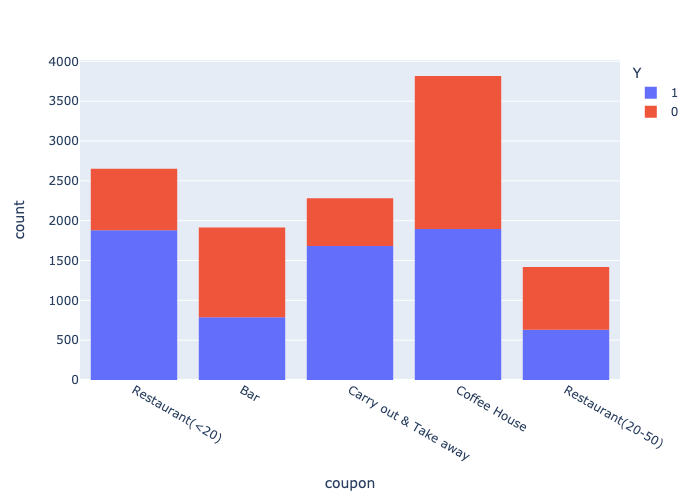

In [11]:
fig = px.histogram(data_cleaned, x="coupon", color = 'Y')
fig.show('png')

6. Use a histogram to visualize the temperature column.

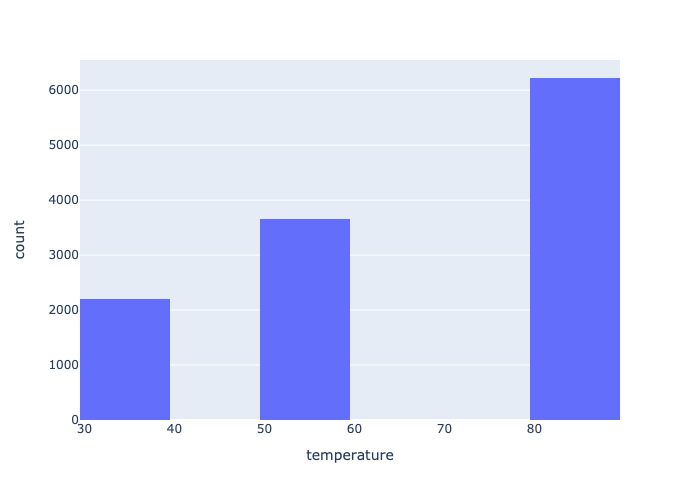

In [12]:
fig = px.histogram(data_cleaned, x="temperature",  nbins=10)
fig.show('png')

#### Investigating the Bar Coupons

1. Create a new `DataFrame` that contains just the bar coupons.


In [12]:
data_bar = data_cleaned.query("coupon == 'Bar'")
data_bar.shape

(1913, 27)

2. What proportion of bar coupons were accepted?


In [13]:
barPerAccept = (data_bar['Y']==1).sum()/data_bar['Y'].count()*100
print('% of the accepted bar coupons were ', round(barPerAccept, 2))

% of the accepted bar coupons were  41.19


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [14]:
barless3PerAccept = (data_bar.query('Bar_int <= 3')['Y']==1).sum()/data_bar.query('Bar_int <= 3')['Y'].count()*100
barmore3PerAccept = (data_bar.query('Bar_int > 3')['Y']==1).sum()/data_bar.query('Bar_int > 3')['Y'].count()*100

print('Acceptance rate for drivers who went to bar 3 or fewer times - ', round(barless3PerAccept, 2), '%')
print('Acceptance rate for drivers who went to bar more than 3 times - ', round(barmore3PerAccept, 2), '%')

Acceptance rate for drivers who went to bar 3 or fewer times -  37.27 %
Acceptance rate for drivers who went to bar more than 3 times -  76.17 %


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [15]:
bar_more1_age_over25 = data_bar.query('Bar_int >1 and age_int > 25')  
others = data_bar.query('Bar_int <= 1 or age_int <=25')
# print(bar_more1_age_over25.shape)
# print(others.shape)

bar_more1_age_over25_PerAccept = (bar_more1_age_over25['Y']==1).sum()/bar_more1_age_over25['Y'].count()*100
others_PerAccept = (others['Y']==1).sum()/others['Y'].count()*100

print('Acceptance rate for drivers who go to bar more than once and are over the age of 25 - ', 
        round(bar_more1_age_over25_PerAccept, 2), '%')
print('Acceptance rate for other drivers - ', round(others_PerAccept, 2), '%')

Acceptance rate for drivers who go to bar more than once and are over the age of 25 -  68.98 %
Acceptance rate for other drivers -  33.77 %


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [16]:
occ_list = ['farming', 'fishing', 'forstry']

bar_more1_pass_notkid_occ = data_bar.query("Bar_int > 1 and passanger != 'Kid(s)' and occupation not in @occ_list")
others = data_bar.query("Bar_int <= 1 or passanger == 'Kid(s)' or occupation in @occ_list")
# print(bar_more1_pass_notkid_occ.shape)
# print(others.shape)

bar_more1_pass_notkid_occ_PerAccept = (bar_more1_pass_notkid_occ['Y']==1).sum()/bar_more1_pass_notkid_occ['Y'].count()*100
others_PerAccept = (others['Y']==1).sum()/others['Y'].count()*100

print('Acceptance rate for drivers who go to bar more than once\n', 
        'and had passengers that were not a kid\n', 
        'and had coocumpation other than farming, fishing, or forestry - ', 
        round(bar_more1_pass_notkid_occ_PerAccept, 2), '%')
print('Acceptance rate for other drivers - ', round(others_PerAccept, 2), '%')


Acceptance rate for drivers who go to bar more than once
 and had passengers that were not a kid
 and had coocumpation other than farming, fishing, or forestry -  70.94 %
Acceptance rate for other drivers -  29.79 %


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [17]:
driver1 = data_bar.query("Bar_int > 1 and passanger != 'Kid(s)' and  maritalStatus != 'Widowed'")
driver2 = data_bar.query("Bar_int > 1 and age_int < 30")

income_list = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']
restlt20_list = ['4~8', 'gt8']
driver3 = data_bar.query("RestaurantLessThan20 in @restlt20_list and income in @income_list")

driver1_PerAccept = (driver1['Y']==1).sum()/driver1['Y'].count()*100
driver2_PerAccept = (driver2['Y']==1).sum()/driver2['Y'].count()*100
driver3_PerAccept = (driver3['Y']==1).sum()/driver3['Y'].count()*100

print('Acceptance rate for drivers who go to bar more than once\n', 
        'and had passengers that were not a kid and were not widowed - ', 
        round(driver1_PerAccept, 2), '%')

print('Acceptance rate for drivers who go to bar more than once\n', 
        'and are under the age of 30 - ', 
        round(driver2_PerAccept, 2), '%')

print('Acceptance rate for drivers who go to cheap restaurants more than 4 times a month\n', 
        'and income less than $50k - ', 
        round(driver3_PerAccept, 2), '%')

Acceptance rate for drivers who go to bar more than once
 and had passengers that were not a kid and were not widowed -  70.94 %
Acceptance rate for drivers who go to bar more than once
 and are under the age of 30 -  71.95 %
Acceptance rate for drivers who go to cheap restaurants more than 4 times a month
 and income less than $50k -  45.65 %


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Hypothesis: Drivers who go to bar more than 3 times, are between the age of 25 and 30, had passengers that were not a kid, had coocumpation other than farming, fishing, or forestry, were not widowed are more inclined to accept the bar coupons.  

In [18]:
driver = data_bar.query("Bar_int > 3 and age_int > 25 and age_int < 30")
(driver['Y']==1).sum()/driver['Y'].count()*100

84.28571428571429

#### Independent Investigation  - Coffee Coupons

In [19]:
data_coffee = data_cleaned.query("coupon == 'Coffee House'")
data_coffee.shape

(3816, 27)

In [20]:
coffeePerAccept = (data_coffee['Y']==1).sum()/data_coffee['Y'].count()*100
print("% of the accepted bar coupons were ", round(coffeePerAccept, 2))

% of the accepted bar coupons were  49.63


Hypothesis: Drivers who are going to no urgent place are more likely to accept coffee coupons

In [21]:
print(data_coffee.groupby("destination")["Y"].sum()/data_coffee.groupby("destination")["Y"].count())
px.histogram(data_coffee, x="destination", color = 'Y')

destination
Home               0.362613
No Urgent Place    0.578178
Work               0.440000
Name: Y, dtype: float64


Hypothesis: Drivers travelling with friends or partner are more likely to accept the coffee coupons.

In [22]:
print(data_coffee.groupby("passanger")["Y"].sum()/data_coffee.groupby("passanger")["Y"].count())
px.histogram(data_coffee, x="passanger", color = 'Y')

passanger
Alone        0.433936
Friend(s)    0.597447
Kid(s)       0.471503
Partner      0.567010
Name: Y, dtype: float64


Hypothesis: Drivers in the morning are more likely to accept coffee coupons

In [23]:
print(data_coffee.groupby("time")["Y"].sum()/data_coffee.groupby("time")["Y"].count())
px.histogram(data_coffee, x="time", color = 'Y')

time
10AM    0.634772
10PM    0.429078
2PM     0.545455
6PM     0.412272
7AM     0.440000
Name: Y, dtype: float64


Hypothesis: Drivers who go to coffeehouse at least once are more likely to accept coffee coupons

In [24]:
print(data_coffee.groupby("CoffeeHouse")["Y"].sum()/data_coffee.groupby("CoffeeHouse")["Y"].count())
px.histogram(data_coffee, x="CoffeeHouse", color = 'Y')

CoffeeHouse
1~3      0.647694
4~8      0.682446
gt8      0.657895
less1    0.480989
never    0.175223
Name: Y, dtype: float64


Hypothesis: Drivers  are more likely to accept coffee coupons for the venue in the same direction

In [25]:
print(data_coffee.groupby("direction_same")["Y"].sum()/data_coffee.groupby("direction_same")["Y"].count())
px.histogram(data_coffee, x="direction_same", color = 'Y')

direction_same
0    0.489355
1    0.526536
Name: Y, dtype: float64


Hypothesis: Students are more likely to be accept the coffee coupons

In [26]:
print(data_coffee.groupby("occupation")["Y"].sum()/data_coffee.groupby("occupation")["Y"].count())
px.histogram(data_coffee, x="occupation", color = 'Y')

occupation
Architecture & Engineering                   0.555556
Arts Design Entertainment Sports & Media     0.500000
Building & Grounds Cleaning & Maintenance    0.727273
Business & Financial                         0.471831
Community & Social Services                  0.378788
Computer & Mathematical                      0.501155
Construction & Extraction                    0.478261
Education&Training&Library                   0.413919
Farming Fishing & Forestry                   0.545455
Food Preparation & Serving Related           0.402597
Healthcare Practitioners & Technical         0.760563
Healthcare Support                           0.615385
Installation Maintenance & Repair            0.568182
Legal                                        0.376812
Life Physical Social Science                 0.475410
Management                                   0.453875
Office & Administrative Support              0.437500
Personal Care & Service                      0.476190
Production Occupa

In [27]:
print(data_coffee.groupby("education")["Y"].sum()/data_coffee.groupby("education")["Y"].count())
px.histogram(data_coffee, x="education", color = 'Y')

education
Associates degree                         0.513846
Bachelors degree                          0.456113
Graduate degree (Masters or Doctorate)    0.507666
High School Graduate                      0.540441
Some High School                          0.607143
Some college - no degree                  0.514307
Name: Y, dtype: float64


In [28]:
print(data_coffee.groupby("age")["Y"].sum()/data_coffee.groupby("age")["Y"].count())
px.histogram(data_coffee, x="age", color = 'Y')

age
0-20      0.678322
21-25     0.517773
26-30     0.513174
31-35     0.483816
36-40     0.468586
41-45     0.492114
46-50     0.506912
50plus    0.419660
Name: Y, dtype: float64


Hypothesis: gender, marital status and has_children have no effect on likelihood of accepting the coffee coupons

In [29]:
print(data_coffee.groupby("gender")["Y"].sum()/data_coffee.groupby("gender")["Y"].count())
print(data_coffee.groupby("has_children")["Y"].sum()/data_coffee.groupby("has_children")["Y"].count())
print(data_coffee.groupby("maritalStatus")["Y"].sum()/data_coffee.groupby("maritalStatus")["Y"].count())
px.histogram(data_coffee, x="maritalStatus", color = 'Y')

gender
Female    0.491112
Male      0.501895
Name: Y, dtype: float64
has_children
0    0.501695
1    0.487637
Name: Y, dtype: float64
maritalStatus
Divorced             0.517483
Married partner      0.491132
Single               0.514362
Unmarried partner    0.470414
Widowed              0.352941
Name: Y, dtype: float64


Hypothesis: income has no effect on likelihood of accepting the coffee coupons

In [30]:
print(data_coffee.groupby("income")["Y"].sum()/data_coffee.groupby("income")["Y"].count())
px.histogram(data_coffee, x="income", color = 'Y')

income
$100000 or More     0.489524
$12500 - $24999     0.552212
$25000 - $37499     0.465154
$37500 - $49999     0.547406
$50000 - $62499     0.498047
$62500 - $74999     0.435424
$75000 - $87499     0.298246
$87500 - $99999     0.539419
Less than $12500    0.540268
Name: Y, dtype: float64


Conclusion: Students who go to coffeehouse at least once a week traveling in the morning with friends goint to no urgent place are more likely to accept the coffee coupons 

In [32]:
hypo_subset = data_coffee.query("occupation ==  'Student' and CoffeeHouse not in ['never', 'less1'] \
    and time == '10AM' and passanger == 'Friend(s)'\
    and destination == 'No Urgent Place'")

non_hypo_subset = data_coffee.query("occupation !=  'Student' or CoffeeHouse in ['never', 'less1'] \
    or time != '10AM' or passanger != 'Friend(s)'\
    or destination != 'No Urgent Place'")

# print(data_coffee.shape)
# print(hypo_subset.shape)
# print(non_hypo_subset.shape)

rate_hypo_subset = (hypo_subset['Y']==1).sum()/hypo_subset['Y'].count()*100
rate_non_hypo_subset = (non_hypo_subset['Y']==1).sum()/non_hypo_subset['Y'].count()*100

print('Acceptance rate for drivers who are students who go coffeehouse at least once',
      'traveling in the morning with friends going to no urgent place - ', round(rate_hypo_subset, 2), '%')
print('Acceptance rate for other drivers - ', round(rate_non_hypo_subset, 2), '%')

Acceptance rate for drivers who are students who go coffeehouse at least once traveling in the morning with friends going to no urgent place -  91.67 %
Acceptance rate for other drivers -  49.37 %
